# Loading the land and ocean maps

The provided ocean and land maps are from Natural Earth <https://www.naturalearthdata.com/downloads/>. They are provided as zip files, but can be extracted to use their Shapefile (.shp) as well. In this example we will use the `ne_10m_land` and `ne_10m_ocean` zip files, which include a detailed map in a 1:10m scale.

In [10]:
import geopandas as gpd

In [11]:
# This example loads the 1:10m scale land and ocean maps
MAP_LAND_PATH = "~/datasets/ne_10m_land.zip"  # Path to the land zip file
MAP_OCEAN_PATH = "~/datasets/ne_10m_ocean.zip"  # Path to the ocean zip file

Here we use GeoPandas to load the maps. In that case we can just pass the zip files for each map directly into the `gpd.read_file` function. This will return a GeoDataFrame with the map data, which can be used to plot points, and check for points inside the land or ocean.

In [12]:
land_world = gpd.read_file(MAP_LAND_PATH)
ocean_world = gpd.read_file(MAP_OCEAN_PATH)

Now that the maps are loaded, we can plot them.

<Axes: >

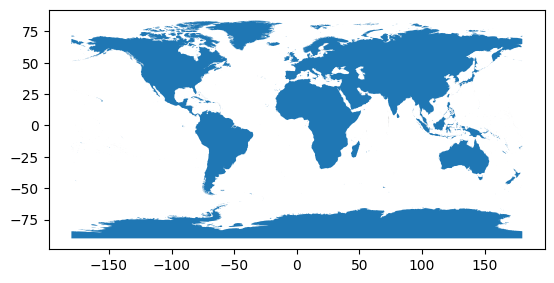

In [13]:
land_world.plot()

<Axes: >

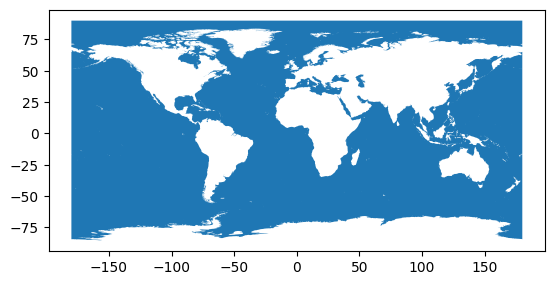

In [14]:
ocean_world.plot()

Checking if a point is inside a land or ocean.

In [29]:
from shapely.geometry import Point

def create_point(lat, lon):
    return gpd.GeoSeries([Point(lat, lon)], crs="EPSG:4326")

POINT_A = create_point(30, -40)  # latitude, longitude. A point in the Atlantic Ocean
POINT_B = create_point(44.182205, 	-84.506836)  # Coordinates for Michigan, USA


In [30]:
land_world.contains(POINT_A).any()

C:\Users\ugioh\AppData\Local\Temp\ipykernel_1040\3780825854.py:1: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  land_world.contains(POINT_A).any()


False

In [31]:
ocean_world.contains(POINT_A).any()

True

In [32]:
land_world.contains(POINT_B).any()

C:\Users\ugioh\AppData\Local\Temp\ipykernel_1040\2708113393.py:1: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  land_world.contains(POINT_B).any()


True

In [33]:
ocean_world.contains(POINT_B).any()

False